<a href="https://colab.research.google.com/github/KagontleBooysen/ols-correlation-analysis/blob/main/Exercise_3_1_Advertising_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Advertising.csv"


In [4]:
import pandas as pd
path = "/content/drive/MyDrive/data/Advertising.csv"

# Load the CSV data into a DataFrame
adv = pd.read_csv(path)

In [5]:
# Drop index if present
if "Unnamed: 0" in adv.columns:
    adv = adv.drop(columns=["Unnamed: 0"])

print(adv.head())
print(adv.columns)  # Confirm TV, radio, newspaper, sale

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


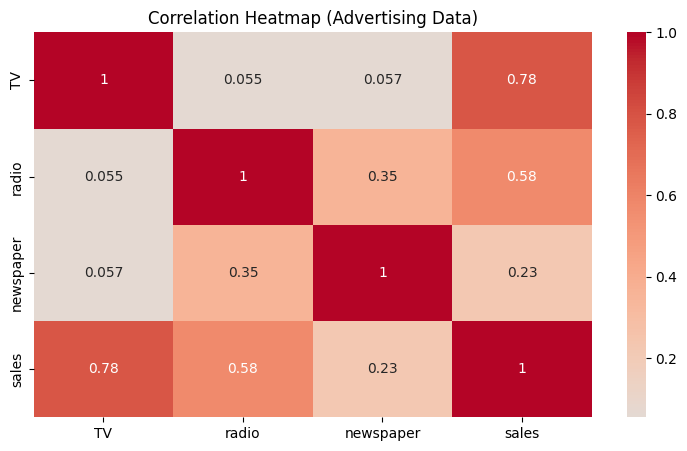

In [6]:
# 2. Correlation heatmap
corr = adv.corr(numeric_only=True)
plt.figure(figsize=(9,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, cbar=True)
plt.title("Correlation Heatmap (Advertising Data)")
plt.show()

In [7]:
# Identify top predictors by |r| with sales
abs_corr = corr["sales"].abs().sort_values(ascending=False)
top2 = abs_corr.index[1:3]   # skip 'sales' itself
print("Top 2 predictors:", top2.tolist())

Top 2 predictors: ['TV', 'radio']


In [8]:
# 3. Fit simple OLS for each top predictor
for feature in top2:
    X = sm.add_constant(adv[feature])  # add intercept
    y = adv["sales"]
    model = sm.OLS(y, X).fit()
    print(f"\n=== sales ~ {feature} ===")
    print(model.summary().tables[1])   # coeff, t, p


=== sales ~ TV ===
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053

=== sales ~ radio ===
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243


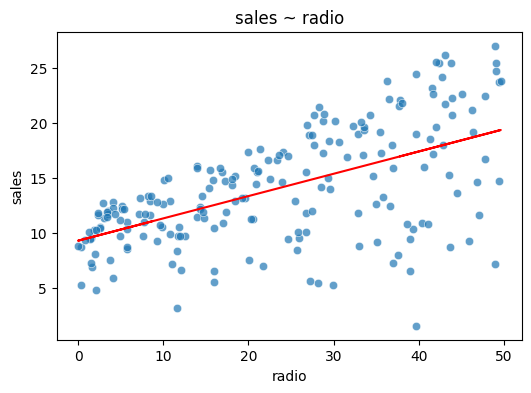

In [9]:
# Scatter plot + fitted line
plt.figure(figsize=(6,4))
sns.scatterplot(x=adv[feature], y=adv["sales"], alpha=0.7)
plt.plot(adv[feature], model.predict(X), color="red")
plt.title(f"sales ~ {feature}")
plt.xlabel(feature)
plt.ylabel("sales")
plt.show()